## Skin Cancer Detection ##


In [30]:
# every ixel needs a neuron
#  We need 3 types of neuron in last layer to classify 3 types of concer
# hidden layers to recognize the hidden patterns in the image
# Activation function to decide which neuron is active
# hidden layers recognize the parts of image
# pooling to reduce size of image matrix to half
# SSD mobile net as the model imported
# 4/1AYBe-g5odNxkJhWv800_dOmIDnJkzd-m9nWwZetZ7Rk4YNBEXLvgLg58cG4


In [31]:
# Importing necessary Libraries
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
from glob import glob

In [33]:
#skin_df = pd.read_csv("/content/drive/My Drive/MLandAI/cancer/HAM10000_metadata.csv")
skin_df = pd.read_csv(r"D:/A drive/python/Skin Cancer detection/HM001/HAM10000_metadata.csv")
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [34]:
image_path = {os.path.splitext(os.path.basename(x))[0]:x
                                for x in glob(os.path.join('D:/A drive/python/Skin Cancer detection/HM001/','*',"*.jpg"))}
print(image_path)

{'ISIC_0024306': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024306.jpg', 'ISIC_0024307': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024307.jpg', 'ISIC_0024308': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024308.jpg', 'ISIC_0024309': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024309.jpg', 'ISIC_0024310': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024310.jpg', 'ISIC_0024311': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024311.jpg', 'ISIC_0024312': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024312.jpg', 'ISIC_0024313': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024313.jpg', 'ISIC_0024314': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024314.jpg', 'ISIC_0024315': 'D:/A drive/python/S

In [35]:
for x in glob(os.path.join('D:/A drive/python/Skin Cancer detection/HM001/',"*","*.jpg")):
    print(x)
    y =  os.path.splitext(os.path.basename(x))[0] # basename is the last word before / 
    print(y)
# y has the image name    
    

D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0024306.jpg
ISIC_0024306
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0024307.jpg
ISIC_0024307
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0024308.jpg
ISIC_0024308
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0024309.jpg
ISIC_0024309
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0024310.jpg
ISIC_0024310
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0024311.jpg
ISIC_0024311
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0024312.jpg
ISIC_0024312
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0024313.jpg
ISIC_0024313
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0024314.jpg
ISIC_0024314
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0024315.jpg
ISIC_0024315
D:/A drive

D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0025211.jpg
ISIC_0025211
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0025212.jpg
ISIC_0025212
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0025213.jpg
ISIC_0025213
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0025214.jpg
ISIC_0025214
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0025215.jpg
ISIC_0025215
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0025216.jpg
ISIC_0025216
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0025217.jpg
ISIC_0025217
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0025218.jpg
ISIC_0025218
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0025219.jpg
ISIC_0025219
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0025220.jpg
ISIC_0025220
D:/A drive

D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026116.jpg
ISIC_0026116
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026117.jpg
ISIC_0026117
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026118.jpg
ISIC_0026118
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026119.jpg
ISIC_0026119
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026120.jpg
ISIC_0026120
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026121.jpg
ISIC_0026121
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026122.jpg
ISIC_0026122
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026123.jpg
ISIC_0026123
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026124.jpg
ISIC_0026124
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026125.jpg
ISIC_0026125
D:/A drive

ISIC_0026865
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026866.jpg
ISIC_0026866
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026867.jpg
ISIC_0026867
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026868.jpg
ISIC_0026868
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026869.jpg
ISIC_0026869
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026870.jpg
ISIC_0026870
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026871.jpg
ISIC_0026871
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026872.jpg
ISIC_0026872
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026873.jpg
ISIC_0026873
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026874.jpg
ISIC_0026874
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0026875.jpg
ISIC_00268

ISIC_0027631
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0027632.jpg
ISIC_0027632
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0027633.jpg
ISIC_0027633
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0027634.jpg
ISIC_0027634
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0027635.jpg
ISIC_0027635
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0027636.jpg
ISIC_0027636
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0027637.jpg
ISIC_0027637
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0027638.jpg
ISIC_0027638
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0027639.jpg
ISIC_0027639
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0027640.jpg
ISIC_0027640
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0027641.jpg
ISIC_00276

D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0028365.jpg
ISIC_0028365
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0028366.jpg
ISIC_0028366
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0028367.jpg
ISIC_0028367
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0028368.jpg
ISIC_0028368
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0028369.jpg
ISIC_0028369
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0028370.jpg
ISIC_0028370
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0028371.jpg
ISIC_0028371
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0028372.jpg
ISIC_0028372
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0028373.jpg
ISIC_0028373
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0028374.jpg
ISIC_0028374
D:/A drive

D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0029115.jpg
ISIC_0029115
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0029116.jpg
ISIC_0029116
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0029117.jpg
ISIC_0029117
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0029118.jpg
ISIC_0029118
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0029119.jpg
ISIC_0029119
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0029120.jpg
ISIC_0029120
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0029121.jpg
ISIC_0029121
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0029122.jpg
ISIC_0029122
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0029123.jpg
ISIC_0029123
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_1\ISIC_0029124.jpg
ISIC_0029124
D:/A drive

ISIC_0029774
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0029775.jpg
ISIC_0029775
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0029776.jpg
ISIC_0029776
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0029777.jpg
ISIC_0029777
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0029778.jpg
ISIC_0029778
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0029779.jpg
ISIC_0029779
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0029780.jpg
ISIC_0029780
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0029781.jpg
ISIC_0029781
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0029782.jpg
ISIC_0029782
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0029783.jpg
ISIC_0029783
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0029784.jpg
ISIC_00297

ISIC_0030364
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030365.jpg
ISIC_0030365
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030366.jpg
ISIC_0030366
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030367.jpg
ISIC_0030367
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030368.jpg
ISIC_0030368
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030369.jpg
ISIC_0030369
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030370.jpg
ISIC_0030370
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030371.jpg
ISIC_0030371
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030372.jpg
ISIC_0030372
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030373.jpg
ISIC_0030373
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030374.jpg
ISIC_00303

ISIC_0030996
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030997.jpg
ISIC_0030997
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030998.jpg
ISIC_0030998
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0030999.jpg
ISIC_0030999
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031000.jpg
ISIC_0031000
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031001.jpg
ISIC_0031001
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031002.jpg
ISIC_0031002
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031003.jpg
ISIC_0031003
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031004.jpg
ISIC_0031004
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031005.jpg
ISIC_0031005
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031006.jpg
ISIC_00310

ISIC_0031921
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031922.jpg
ISIC_0031922
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031923.jpg
ISIC_0031923
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031924.jpg
ISIC_0031924
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031925.jpg
ISIC_0031925
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031926.jpg
ISIC_0031926
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031927.jpg
ISIC_0031927
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031928.jpg
ISIC_0031928
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031929.jpg
ISIC_0031929
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031930.jpg
ISIC_0031930
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0031931.jpg
ISIC_00319

ISIC_0032708
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0032709.jpg
ISIC_0032709
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0032710.jpg
ISIC_0032710
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0032711.jpg
ISIC_0032711
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0032712.jpg
ISIC_0032712
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0032713.jpg
ISIC_0032713
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0032714.jpg
ISIC_0032714
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0032715.jpg
ISIC_0032715
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0032716.jpg
ISIC_0032716
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0032717.jpg
ISIC_0032717
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0032718.jpg
ISIC_00327

ISIC_0033656
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0033657.jpg
ISIC_0033657
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0033658.jpg
ISIC_0033658
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0033659.jpg
ISIC_0033659
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0033660.jpg
ISIC_0033660
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0033661.jpg
ISIC_0033661
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0033662.jpg
ISIC_0033662
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0033663.jpg
ISIC_0033663
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0033664.jpg
ISIC_0033664
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0033665.jpg
ISIC_0033665
D:/A drive/python/Skin Cancer detection/HM001\HAM10000_images_part_2\ISIC_0033666.jpg
ISIC_00336

In [36]:
# Adding path of image as a column to the dataframe
skin_df2 = pd.read_csv(r"D:/A drive/python/Skin Cancer detection/HM001/HAM10000_metadata.csv")
skin_df2["path"] = skin_df2["image_id"].map(image_path.get)
skin_df2

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,D:/A drive/python/Skin Cancer detection/HM001\...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,D:/A drive/python/Skin Cancer detection/HM001\...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,D:/A drive/python/Skin Cancer detection/HM001\...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,D:/A drive/python/Skin Cancer detection/HM001\...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,D:/A drive/python/Skin Cancer detection/HM001\...
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,D:/A drive/python/Skin Cancer detection/HM001\...
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,D:/A drive/python/Skin Cancer detection/HM001\...
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,D:/A drive/python/Skin Cancer detection/HM001\...
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,D:/A drive/python/Skin Cancer detection/HM001\...


In [40]:
# Resize each image to 32 X 32
skin_df2['image'] = skin_df2['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))
skin_df2


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[191, 152, 192], [194, 154, 193], [196, 152,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[24, 14, 29], [56, 39, 64], [106, 80, 112], ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[190, 136, 150], [199, 145, 161], [200, 141,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[35, 18, 28], [83, 51, 64], [128, 88, 103], ..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[155, 110, 135], [188, 139, 168], [210, 157,..."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[181, 164, 179], [179, 162, 176], [180, 163,..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[4, 5, 3], [24, 22, 21], [101, 88, 88], [128..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[132, 119, 120], [157, 139, 138], [177, 158,..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[160, 123, 144], [163, 131, 152], [166, 128,..."


In [41]:
print(skin_df2['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [47]:
# n_samples = 5
# fig, m_axs = plt.subplots(7, n_samples,figsize = (4*n_samples,3*7))
# for n_axs,(type_name,type_rows) in zip(m_axs,skin_df2.sort_values(['dx']).groupby('dx')):
#     n_axs[0].set_title(type_name)
#     for c_ax,(_,c_row) in zip(n_axs,type_rows.sample(n_samples(n_samples,random_state = 0))):
#         c_ax.imshow(c_row['image'])
#         c_ax.axis('off')

In [79]:
# Better Way to categorize sort image data into sub folders then predict using keras
import pandas as pd
import os
import shutil

In [80]:
# put all images in 1 folder called all_data
data_dir = "D:/A drive/python/Skin Cancer detection/HM001/all_data/"

# organize all images in new folder
des_dir = "D:/A drive/python/Skin Cancer detection/HM001/reorganized/"

In [81]:
skin_df2 =  pd.read_csv(r"D:/A drive/python/Skin Cancer detection/HM001/HAM10000_metadata.csv")
skin_df2

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [82]:
print(skin_df2['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [83]:
# extract all the unique values to a list
labels = skin_df2['dx'].unique().tolist()
labels
# labels has all the unique labels in the list

['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']

In [87]:
label_images = []

for i in labels:
    # create a directory of the files
    # os.mkdir(des_dir + str(i) + "/")
    sample = skin_df2[skin_df2["dx"] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir +"/"+id+".jpg"),(des_dir + i +"/"+id+".jpg") )
    label_images = []    

In [106]:
for i in labels:
    # create a directory of the files
    # os.mkdir(des_dir + str(i) + "/")
    sample = skin_df2[skin_df2["dx"] == i]['image_id']
    label_images.extend(sample)
    print(sample)
    print(label_images)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [97]:
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt


In [98]:
# Data Augmentation
datagen = ImageDataGenerator()

train_dir = "D:/A drive/python/Skin Cancer detection/HM001/reorganized"

In [102]:
# training keras model
train_data_keras = datagen.flow_from_directory(directory = train_dir,
                                              class_mode= "categorical", # as many types pof cancer present
                                              batch_size = 16, target_size = (32,32))
# resizing the images to 32 X 32 size

Found 10015 images belonging to 7 classes.


In [104]:
x,y = next(train_data_keras)
print(x,y)
# x,y have all the numpy array values of the images

[[[[212. 121. 139.]
   [209. 120. 142.]
   [211. 122. 140.]
   ...
   [215. 125. 151.]
   [210. 127. 145.]
   [203. 120. 140.]]

  [[201. 114. 130.]
   [208. 127. 142.]
   [212. 129. 147.]
   ...
   [200. 120. 131.]
   [206. 121. 140.]
   [203. 125. 141.]]

  [[205. 122. 138.]
   [210. 123. 139.]
   [210. 127. 143.]
   ...
   [204. 124. 137.]
   [207. 114. 132.]
   [199. 112. 129.]]

  ...

  [[189. 108. 117.]
   [196. 114. 126.]
   [199. 119. 130.]
   ...
   [203. 128. 133.]
   [200. 130. 130.]
   [193. 125. 126.]]

  [[196. 116. 129.]
   [193. 113. 126.]
   [197. 113. 129.]
   ...
   [200. 127. 134.]
   [196. 126. 126.]
   [197. 126. 130.]]

  [[189. 114. 119.]
   [187. 107. 120.]
   [193. 108. 127.]
   ...
   [194. 131. 126.]
   [195. 124. 130.]
   [191. 118. 125.]]]


 [[[165. 130. 128.]
   [157. 124. 115.]
   [161. 129. 118.]
   ...
   [160. 123. 104.]
   [150. 110.  85.]
   [150. 114.  88.]]

  [[156. 132. 120.]
   [164. 127. 118.]
   [164. 129. 110.]
   ...
   [158. 125. 116.]
 

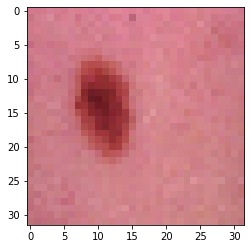

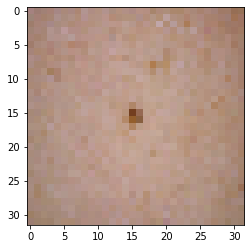

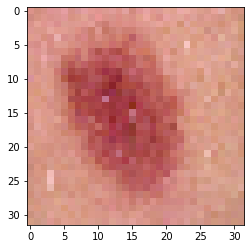

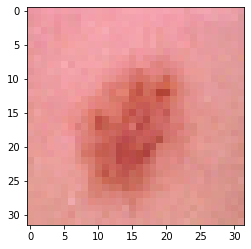

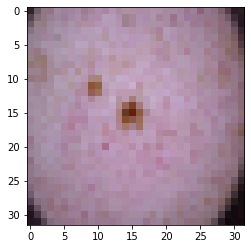

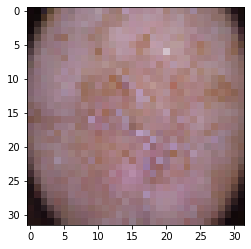

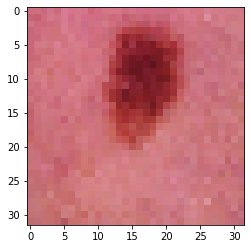

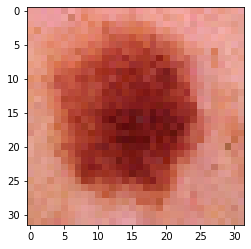

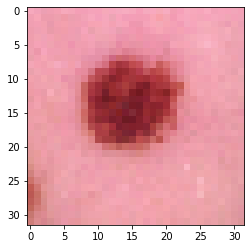

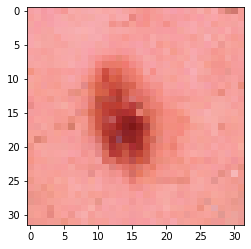

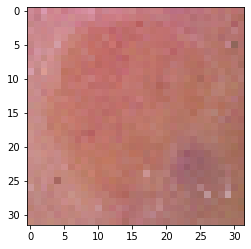

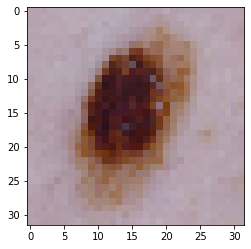

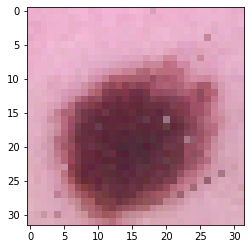

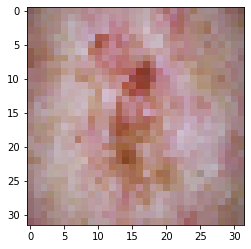

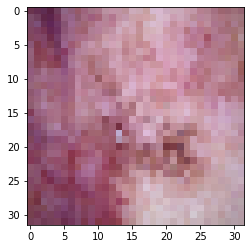

In [105]:
# plotting the keras images
# plotting first 15 images
for i in range(0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()

In [109]:
# Use Gan to find the best model
import seaborn as sns
import keras
from keras.utils.np_utils import to_categorical # As multiclass classification
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder # for converting the 7 labels to 1,2,3...7

np.random.seed(42)



In [110]:
skin_df2

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [111]:
SIZE = 32

# create a new column of labels 1 to 7 for the classes using label encoder

le = LabelEncoder()
le.fit(skin_df["dx"])

# creating a new column with label values
skin_df2["label"] = le.transform(skin_df2["dx"])

skin_df2.sample(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
1617,HAM_0007180,ISIC_0033272,mel,histo,65.0,male,face,4
8128,HAM_0007195,ISIC_0031923,nv,histo,40.0,female,lower extremity,5
2168,HAM_0001835,ISIC_0026652,mel,histo,65.0,male,back,4
1090,HAM_0000465,ISIC_0030583,bkl,consensus,35.0,female,trunk,2
7754,HAM_0001720,ISIC_0034010,nv,histo,45.0,male,abdomen,5
8071,HAM_0006333,ISIC_0024424,nv,histo,35.0,male,trunk,5
7423,HAM_0004548,ISIC_0032832,nv,histo,45.0,female,upper extremity,5
8984,HAM_0006526,ISIC_0026671,nv,histo,55.0,male,lower extremity,5
2310,HAM_0003102,ISIC_0032389,mel,histo,65.0,male,face,4
7256,HAM_0004260,ISIC_0025525,nv,histo,65.0,male,back,5


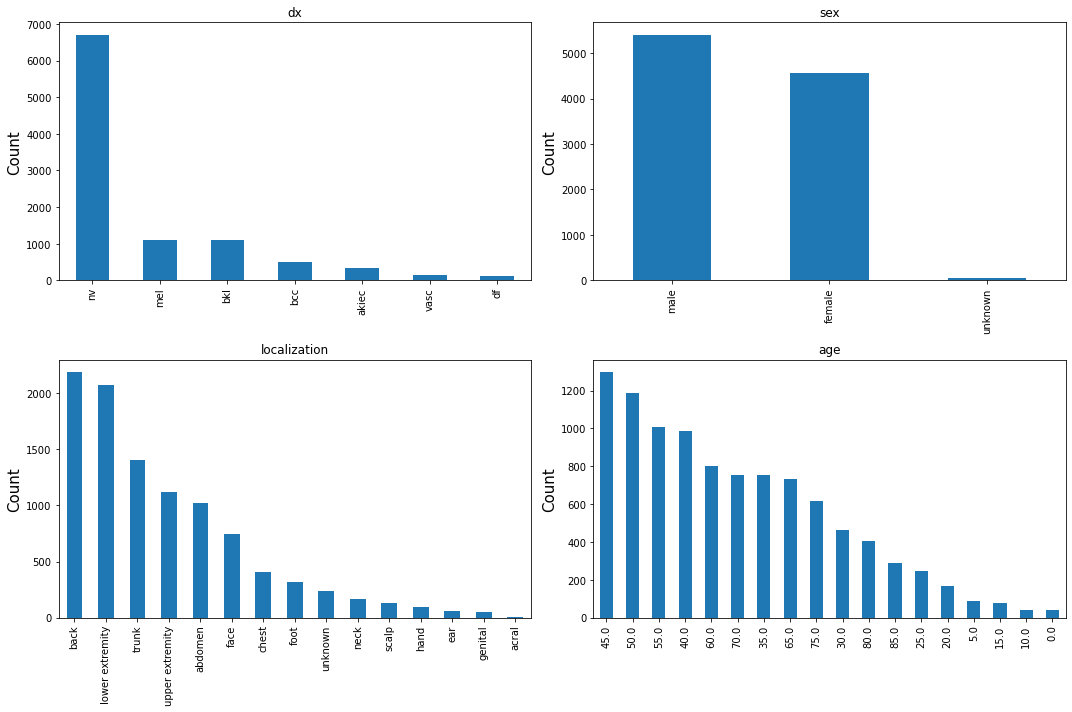

In [116]:
# plot data to check the variations among the data values

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
skin_df2["dx"].value_counts().plot(kind = "bar", ax = ax1)
ax1.set_ylabel('Count', size = 15)
ax1.set_title('dx')

ax2 = fig.add_subplot(222)
skin_df2["sex"].value_counts().plot(kind = "bar", ax = ax2)
ax2.set_ylabel('Count', size = 15)
ax2.set_title('sex')

ax3 = fig.add_subplot(223)
skin_df2["localization"].value_counts().plot(kind = "bar", ax = ax3)
ax3.set_ylabel('Count', size = 15)
ax3.set_title('localization')

ax4 = fig.add_subplot(224)
skin_df2["age"].value_counts().plot(kind = "bar", ax = ax4)
ax4.set_ylabel('Count', size = 15)
ax4.set_title('age')

plt.tight_layout()
plt.show()
# Not well balanced data

In [119]:
# For an unbalanced data set we can now balance it to around 500 samples each then add more images duplicates to make
# number of samples per set around 500

from sklearn.utils import resample

# remove each and every class augment then concatinate it
df_0 = skin_df2[skin_df2['label'] == 0]
df_1 = skin_df2[skin_df2['label'] == 1]
df_2 = skin_df2[skin_df2['label'] == 2]
df_3 = skin_df2[skin_df2['label'] == 3]
df_4 = skin_df2[skin_df2['label'] == 4]
df_5 = skin_df2[skin_df2['label'] == 5]
df_6 = skin_df2[skin_df2['label'] == 6]

n_samples = 500

df_0_balanced = resample(df_0,replace = True, n_samples = n_samples, random_state = 42)
df_1_balanced = resample(df_1,replace = True, n_samples = n_samples, random_state = 42)
df_2_balanced = resample(df_2,replace = True, n_samples = n_samples, random_state = 42)
df_3_balanced = resample(df_3,replace = True, n_samples = n_samples, random_state = 42)
df_4_balanced = resample(df_4,replace = True, n_samples = n_samples, random_state = 42)
df_5_balanced = resample(df_5,replace = True, n_samples = n_samples, random_state = 42)
df_6_balanced = resample(df_6,replace = True, n_samples = n_samples, random_state = 42)

# combine the  dataframes together

skin_df_balanced = pd.concat([df_0_balanced,df_1_balanced,df_2_balanced,df_3_balanced,df_4_balanced,df_5_balanced,df_6_balanced])

skin_df_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0
...,...,...,...,...,...,...,...,...
2375,HAM_0005989,ISIC_0033123,vasc,histo,25.0,female,back,6
2436,HAM_0004943,ISIC_0027790,vasc,consensus,50.0,female,face,6
2453,HAM_0001038,ISIC_0024706,vasc,consensus,50.0,male,trunk,6
2377,HAM_0007097,ISIC_0033762,vasc,histo,60.0,male,trunk,6


In [121]:
skin_df_balanced['dx'].value_counts()

df       500
mel      500
bkl      500
nv       500
bcc      500
akiec    500
vasc     500
Name: dx, dtype: int64

In [122]:
# Resizing the balanced data set
image_path2 = {os.path.splitext(os.path.basename(x))[0]:x
                                for x in glob(os.path.join('D:/A drive/python/Skin Cancer detection/HM001/','*',"*.jpg"))}
print(image_path2)

skin_df_balanced["path"] = skin_df_balanced["image_id"].map(image_path2.get)

# Resize each image to 32 X 32
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))


{'ISIC_0024306': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024306.jpg', 'ISIC_0024307': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024307.jpg', 'ISIC_0024308': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024308.jpg', 'ISIC_0024309': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024309.jpg', 'ISIC_0024310': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024310.jpg', 'ISIC_0024311': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024311.jpg', 'ISIC_0024312': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024312.jpg', 'ISIC_0024313': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024313.jpg', 'ISIC_0024314': 'D:/A drive/python/Skin Cancer detection/HM001\\HAM10000_images_part_1\\ISIC_0024314.jpg', 'ISIC_0024315': 'D:/A drive/python/S

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path,image
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[155, 118, 107], [162, 126, 118], [174, 140,..."
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[138, 76, 82], [131, 64, 68], [139, 73, 81],..."
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[123, 86, 87], [174, 137, 137], [197, 161, 1..."
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[205, 149, 175], [207, 149, 169], [214, 158,..."
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[203, 174, 199], [205, 174, 197], [206, 175,..."
...,...,...,...,...,...,...,...,...,...,...
2375,HAM_0005989,ISIC_0033123,vasc,histo,25.0,female,back,6,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[15, 12, 12], [40, 30, 32], [87, 67, 71], [1..."
2436,HAM_0004943,ISIC_0027790,vasc,consensus,50.0,female,face,6,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[148, 109, 118], [121, 93, 102], [112, 87, 9..."
2453,HAM_0001038,ISIC_0024706,vasc,consensus,50.0,male,trunk,6,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[248, 181, 199], [248, 183, 201], [248, 186,..."
2377,HAM_0007097,ISIC_0033762,vasc,histo,60.0,male,trunk,6,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[180, 133, 143], [189, 147, 158], [192, 150,..."


In [123]:
skin_df_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path,image
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[155, 118, 107], [162, 126, 118], [174, 140,..."
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[138, 76, 82], [131, 64, 68], [139, 73, 81],..."
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[123, 86, 87], [174, 137, 137], [197, 161, 1..."
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[205, 149, 175], [207, 149, 169], [214, 158,..."
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[203, 174, 199], [205, 174, 197], [206, 175,..."
...,...,...,...,...,...,...,...,...,...,...
2375,HAM_0005989,ISIC_0033123,vasc,histo,25.0,female,back,6,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[15, 12, 12], [40, 30, 32], [87, 67, 71], [1..."
2436,HAM_0004943,ISIC_0027790,vasc,consensus,50.0,female,face,6,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[148, 109, 118], [121, 93, 102], [112, 87, 9..."
2453,HAM_0001038,ISIC_0024706,vasc,consensus,50.0,male,trunk,6,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[248, 181, 199], [248, 183, 201], [248, 186,..."
2377,HAM_0007097,ISIC_0033762,vasc,histo,60.0,male,trunk,6,D:/A drive/python/Skin Cancer detection/HM001\...,"[[[180, 133, 143], [189, 147, 158], [192, 150,..."


In [124]:
# x is the image and y is the label
x = np.asarray(skin_df_balanced["image"].tolist()) # convert to list to pass into a numpy array


In [125]:
x

array([[[[155, 118, 107],
         [162, 126, 118],
         [174, 140, 138],
         ...,
         [159, 118, 103],
         [161, 128, 120],
         [136, 110, 104]],

        [[147, 107,  93],
         [156, 117, 105],
         [170, 133, 128],
         ...,
         [172, 133, 121],
         [176, 143, 133],
         [172, 145, 139]],

        [[165, 131, 123],
         [156, 115, 100],
         [156, 113, 103],
         ...,
         [172, 133, 117],
         [167, 130, 113],
         [161, 129, 123]],

        ...,

        [[144, 108,  90],
         [150, 115,  95],
         [155, 119,  99],
         ...,
         [182, 148, 137],
         [182, 149, 137],
         [184, 155, 147]],

        [[144, 109,  88],
         [149, 114,  95],
         [153, 116,  96],
         ...,
         [181, 145, 133],
         [186, 155, 145],
         [182, 155, 149]],

        [[141, 105,  86],
         [144, 107,  88],
         [150, 113,  93],
         ...,
         [179, 146, 133],
        

In [128]:
X = x /255 # normalize the values between 0 to 1
# y is the independent label output
y = skin_df_balanced['label']
y

9789    0
9957    0
9793    0
9758    0
9875    0
       ..
2375    6
2436    6
2453    6
2377    6
2363    6
Name: label, Length: 3500, dtype: int32

In [129]:
y_cat = to_categorical(y,num_classes = 7)# makes the categorival output here for deep learning
y_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [135]:
# training and testing data split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y_cat, test_size= 0.25,random_state=42)
# Auto keras to get the best hyper parameters for the model
# Model defination
num_classes = 7


# model creation
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)         

In [136]:
# Training

batch_size = 16
epochs = 50
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)


Epoch 1/50
165/165 - 20s - loss: 1.8898 - acc: 0.1851 - val_loss: 1.7897 - val_acc: 0.2663
Epoch 2/50
165/165 - 17s - loss: 1.7378 - acc: 0.2754 - val_loss: 1.6090 - val_acc: 0.3463
Epoch 3/50
165/165 - 17s - loss: 1.5574 - acc: 0.3638 - val_loss: 1.5084 - val_acc: 0.3886
Epoch 4/50
165/165 - 21s - loss: 1.4711 - acc: 0.3920 - val_loss: 1.4857 - val_acc: 0.3486
Epoch 5/50
165/165 - 21s - loss: 1.4420 - acc: 0.4126 - val_loss: 1.4405 - val_acc: 0.4446
Epoch 6/50
165/165 - 21s - loss: 1.3984 - acc: 0.4465 - val_loss: 1.3886 - val_acc: 0.4229
Epoch 7/50
165/165 - 19s - loss: 1.3541 - acc: 0.4705 - val_loss: 1.3996 - val_acc: 0.3966
Epoch 8/50
165/165 - 19s - loss: 1.3063 - acc: 0.4903 - val_loss: 1.2912 - val_acc: 0.4731
Epoch 9/50
165/165 - 17s - loss: 1.3015 - acc: 0.4872 - val_loss: 1.2835 - val_acc: 0.4674
Epoch 10/50
165/165 - 17s - loss: 1.2677 - acc: 0.5215 - val_loss: 1.2360 - val_acc: 0.4960
Epoch 11/50
165/165 - 18s - loss: 1.2417 - acc: 0.5063 - val_loss: 1.3117 - val_acc: 0.49

In [138]:
score = model.evaluate(x_test,y_test)
print('Test accuracy', score[1])

28/28 [==============================] - 2s 59ms/step - loss: 0.8422 - acc: 0.7086
Test accuracy 0.7085714340209961


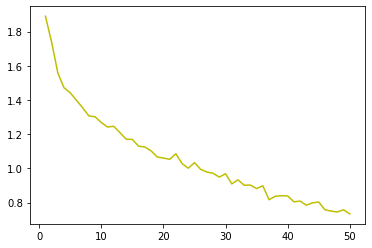

In [144]:
loss_curve = history.history['loss']
epoches = range(1,len(loss) + 1)
plt.plot(epochs,loss_curve,'y',label = 'loss')
plt.show()

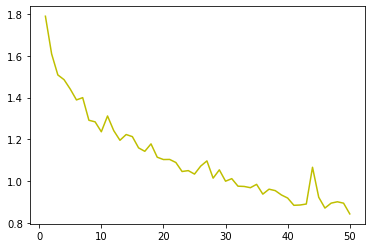

In [145]:
val_loss_curve = history.history['val_loss']
epoches = range(1,len(loss) + 1)
plt.plot(epochs,val_loss_curve,'y',label = 'validation loss')
plt.show()

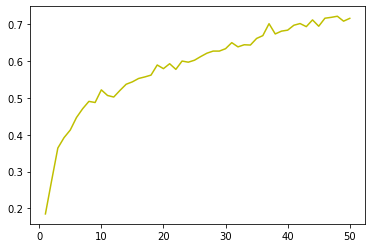

In [147]:
acc = history.history['acc']
epoches = range(1,len(loss) + 1)
plt.plot(epochs,acc,'y',label = 'Accuracy')
plt.show()

In [142]:
# predict
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true= np.argmax(y_test,axis = 1) 

y_pred

array([[3.95169377e-01, 1.18331142e-01, 8.08804110e-02, ...,
        2.05614734e-02, 7.35057006e-03, 4.13173519e-04],
       [2.42374707e-02, 1.99989423e-01, 5.67918301e-01, ...,
        1.86868712e-01, 1.91849489e-02, 5.75163140e-05],
       [4.80105616e-02, 1.28432410e-02, 5.03945304e-03, ...,
        9.11451638e-01, 2.24943571e-02, 1.52246957e-05],
       ...,
       [1.73269538e-04, 5.22887509e-04, 1.70647204e-01, ...,
        7.12769747e-01, 1.15835644e-01, 7.50970699e-08],
       [1.05832845e-12, 4.72245529e-06, 1.39659063e-13, ...,
        7.43784756e-11, 6.90905511e-09, 9.99995232e-01],
       [1.01003442e-02, 3.07853967e-02, 7.14590371e-01, ...,
        6.99141845e-02, 1.28300399e-01, 2.41409871e-04]], dtype=float32)